In [21]:
## Create IC Sprectrum of all events ##
## Each pointcloud has an attribute called ic_amplitude ##
## The IC Spectrum is a histogram of this value ##

In [37]:
from spyral.core.run_stacks import form_run_string
from spyral_utils.plot import Histogrammer ## Custom histogramming tool 

from pathlib import Path
import h5py
import polars as pl
import matplotlib.pyplot as plt

%matplotlib widget

In [23]:
path_to_converted = Path("c:\\Users\\schaeffe\\Desktop\\e20009_dalitz_output\\Pointcloud") ## Follow naming convetion of spyral-v16 

start_run = 108
end_run = 320

In [24]:
# Create a list to store the event data
event_data_list = []
total_events = 0  # Counter to keep track of the total number of events

# Iterate over the runs
for run_number in range(start_run, end_run):  
    print(f"Processing Run Number: {run_number}")

    converted_file_path = path_to_converted / f"{form_run_string(run_number)}.h5" 

    # Ensure the converted file exists
    if not converted_file_path.exists():
        print(f"Converted file not found: {converted_file_path}. Skipping ...")
        continue

    with h5py.File(converted_file_path, 'r') as converted_file:
        cloud_group: h5py.Group = converted_file.get('cloud')
        if cloud_group is None:
            print("No 'cloud' group found. Skipping ...")
            continue

        # Ensure attributes exist before accessing them
        if "min_event" not in cloud_group.attrs or "max_event" not in cloud_group.attrs:
            print("Missing min_event or max_event attributes. Skipping ...")
            continue
        
        min_event = cloud_group.attrs['min_event']
        max_event = cloud_group.attrs['max_event']
        print(f"Events range from {min_event} to {max_event}")

        # Iterate through events
        for event_number in range(min_event, max_event + 1):
            event_key = f'cloud_{event_number}'
            if event_key in cloud_group:
                pc_dataset = cloud_group[event_key]
                
                # Extract the relevant attributes
                event_data = {
                    "run_number": run_number,
                    "event_number": event_number,
                    "orig_run": pc_dataset.attrs.get("orig_run", None),
                    "orig_event": pc_dataset.attrs.get("orig_event", None),
                    "ic_amplitude": pc_dataset.attrs.get("ic_amplitude", None),
                    "ic_centroid": pc_dataset.attrs.get("ic_centroid", None),
                    "ic_integral": pc_dataset.attrs.get("ic_integral", None),
                    "ic_multiplicity": pc_dataset.attrs.get("ic_multiplicity", None),
                    "ic_sca_centroid": pc_dataset.attrs.get("ic_sca_centroid", None),
                    "ic_sca_multiplicity": pc_dataset.attrs.get("ic_sca_multiplicity", None)
                }

                # Append the data to the list
                event_data_list.append(event_data)
                total_events += 1  # Increment the event counter

# Convert the list to a pandas DataFrame (if you prefer to work with pandas)
df = pl.DataFrame(event_data_list)
print(f"Total events processed: {total_events}")
print(df)


Processing Run Number: 108
Events range from 218 to 22307
Processing Run Number: 109
Events range from 22308 to 46451


KeyboardInterrupt: 

In [ ]:
# columns_to_remove = ["run_number", "event_number"]
# df = df.drop(columns_to_remove)
print(df)

shape: (4_801_272, 8)
┌──────────┬────────────┬────────────┬────────────┬────────────┬───────────┬───────────┬───────────┐
│ orig_run ┆ orig_event ┆ ic_amplitu ┆ ic_centroi ┆ ic_integra ┆ ic_multip ┆ ic_sca_ce ┆ ic_sca_mu │
│ ---      ┆ ---        ┆ de         ┆ d          ┆ l          ┆ licity    ┆ ntroid    ┆ ltiplicit │
│ i64      ┆ i64        ┆ ---        ┆ ---        ┆ ---        ┆ ---       ┆ ---       ┆ y         │
│          ┆            ┆ f64        ┆ f64        ┆ f64        ┆ f64       ┆ f64       ┆ ---       │
│          ┆            ┆            ┆            ┆            ┆           ┆           ┆ f64       │
╞══════════╪════════════╪════════════╪════════════╪════════════╪═══════════╪═══════════╪═══════════╡
│ 108      ┆ 218        ┆ 1025.0     ┆ 69.200364  ┆ 6363.0     ┆ 1.0       ┆ 70.71429  ┆ 2.0       │
│ 108      ┆ 219        ┆ 768.0      ┆ 68.002183  ┆ 4069.0     ┆ 1.0       ┆ 70.779918 ┆ 1.0       │
│ 108      ┆ 220        ┆ 862.0      ┆ 68.064526  ┆ 3232.0     ┆ 2.0 

In [ ]:
print(df)

shape: (4_801_272, 8)
┌──────────┬────────────┬────────────┬────────────┬────────────┬───────────┬───────────┬───────────┐
│ orig_run ┆ orig_event ┆ ic_amplitu ┆ ic_centroi ┆ ic_integra ┆ ic_multip ┆ ic_sca_ce ┆ ic_sca_mu │
│ ---      ┆ ---        ┆ de         ┆ d          ┆ l          ┆ licity    ┆ ntroid    ┆ ltiplicit │
│ i64      ┆ i64        ┆ ---        ┆ ---        ┆ ---        ┆ ---       ┆ ---       ┆ y         │
│          ┆            ┆ f64        ┆ f64        ┆ f64        ┆ f64       ┆ f64       ┆ ---       │
│          ┆            ┆            ┆            ┆            ┆           ┆           ┆ f64       │
╞══════════╪════════════╪════════════╪════════════╪════════════╪═══════════╪═══════════╪═══════════╡
│ 108      ┆ 218        ┆ 1025.0     ┆ 69.200364  ┆ 6363.0     ┆ 1.0       ┆ 70.71429  ┆ 2.0       │
│ 108      ┆ 219        ┆ 768.0      ┆ 68.002183  ┆ 4069.0     ┆ 1.0       ┆ 70.779918 ┆ 1.0       │
│ 108      ┆ 220        ┆ 862.0      ┆ 68.064526  ┆ 3232.0     ┆ 2.0 

In [ ]:
# output_parquet_path = Path("c:\\Users\\schaeffe\\Desktop\\e20009_dalitz_output\\total_event_data.parquet")

# # Convert to LazyFrame and collect
# df = pl.LazyFrame(event_data_list).collect()

# # Save to a Parquet file
# df.write_parquet(output_parquet_path)

# print(f"Total events processed: {total_events}")
# print(f"Data saved to: {output_parquet_path}")

Total events processed: 4801272
Data saved to: c:\Users\schaeffe\Desktop\e20009_dalitz_output\total_event_data.parquet


In [ ]:
big_parquet_path = Path("c:\\Users\\schaeffe\\Desktop\\e20009_dalitz_output\\total_event_data.parquet")
output_dir = Path("c:\\Users\\schaeffe\\Desktop\\e20009_dalitz_output\\EventData")

# Ensure output directory exists
output_dir.mkdir(parents=True, exist_ok=True)

# Load the big Parquet file
df = pl.read_parquet(big_parquet_path)

# Get unique runs
unique_runs = df["orig_run"].unique().to_list()

# Split and save each run separately
for run in unique_runs:
    run_df = df.filter(df["orig_run"] == run)
    run_parquet_path = output_dir / f"{form_run_string(run_number)}.parquet"
    run_df.write_parquet(run_parquet_path)
    print(f"Saved {len(run_df)} events to {run_parquet_path}")

print("Splitting complete.")

Saved 22090 events to c:\Users\schaeffe\Desktop\e20009_dalitz_output\EventData\run_0108.parquet
Saved 24144 events to c:\Users\schaeffe\Desktop\e20009_dalitz_output\EventData\run_0109.parquet
Saved 14456 events to c:\Users\schaeffe\Desktop\e20009_dalitz_output\EventData\run_0110.parquet
Saved 46804 events to c:\Users\schaeffe\Desktop\e20009_dalitz_output\EventData\run_0112.parquet
Saved 63887 events to c:\Users\schaeffe\Desktop\e20009_dalitz_output\EventData\run_0113.parquet
Saved 53173 events to c:\Users\schaeffe\Desktop\e20009_dalitz_output\EventData\run_0114.parquet
Saved 48377 events to c:\Users\schaeffe\Desktop\e20009_dalitz_output\EventData\run_0115.parquet
Saved 19145 events to c:\Users\schaeffe\Desktop\e20009_dalitz_output\EventData\run_0116.parquet
Saved 31204 events to c:\Users\schaeffe\Desktop\e20009_dalitz_output\EventData\run_0117.parquet
Saved 28128 events to c:\Users\schaeffe\Desktop\e20009_dalitz_output\EventData\run_0118.parquet
Saved 12394 events to c:\Users\schaeffe\

In [26]:
# Define paths
input_dir = Path("c:\\Users\\schaeffe\\Desktop\\e20009_dalitz_output\\Pointcloud")
output_dir = Path("c:\\Users\\schaeffe\\Desktop\\e20009_dalitz_output\\EventData")
output_dir.mkdir(parents=True, exist_ok=True)

# Define runs to process
start_run = 320
end_run = 320  # Adjust as needed

for run_number in range(start_run, end_run+1):
    h5_file_path = input_dir / f"{form_run_string(run_number)}.h5" 
    
    
    if not h5_file_path.exists():
        print(f"File {h5_file_path} not found. Skipping...")
        continue

    with h5py.File(h5_file_path, 'r') as h5_file:
        cloud_group = h5_file.get('cloud')
        if cloud_group is None:
            print(f"No 'cloud' group in {h5_file_path}. Skipping...")
            continue

        min_event = cloud_group.attrs['min_event']
        max_event = cloud_group.attrs['max_event']

        event_data_list = []

        for event_number in range(min_event, max_event + 1):
            event_key = f'cloud_{event_number}'
            if event_key in cloud_group:
                dataset = cloud_group[event_key]

                event_data = {
                    "orig_run": run_number,
                    "orig_event": event_number,
                    "ic_amplitude": dataset.attrs.get("ic_amplitude", 0),
                    "ic_centroid": dataset.attrs.get("ic_centroid", 0.0),
                    "ic_integral": dataset.attrs.get("ic_integral", 0),
                    "ic_multiplicity": dataset.attrs.get("ic_multiplicity", 0),
                    "ic_sca_centroid": dataset.attrs.get("ic_sca_centroid", 0.0),
                    "ic_sca_multiplicity": dataset.attrs.get("ic_sca_multiplicity", 0),
                }
                event_data_list.append(event_data)

        if event_data_list:
            df = pl.DataFrame(event_data_list)
            parquet_file_path = output_dir / f"{form_run_string(run_number)}.parquet" 
            df.write_parquet(parquet_file_path)
            print(f"Saved {len(df)} events to {parquet_file_path}")

print("Processing complete.")


Saved 37052 events to c:\Users\schaeffe\Desktop\e20009_dalitz_output\EventData\run_0320.parquet
Processing complete.


In [43]:
grammer = Histogrammer()

grammer.add_hist1d('total_events_ic', 4095, (0.0, 4095.0))

event_data_path = Path("c:\\Users\\schaeffe\\Desktop\\e20009_dalitz_output\\EventData")

start_run = 108
end_run = 320  # Adjust as needed

ic_min_val = 900
ic_max_val = 1300

for run in range(start_run, end_run+1):
    df = None
    try:
        path = event_data_path / f"{form_run_string(run)}.parquet"
        df = pl.read_parquet(path)
    except Exception:
        continue

    # Apply appropriate analysis gates
    df = df.filter((pl.col("ic_multiplicity") == 1)
                 & (pl.col("ic_sca_multiplicity") == 1))
    df = df.filter(
        (abs(pl.col("ic_centroid") - pl.col("ic_sca_centroid")) <= 10)
    )
    df = df.filter((pl.col('ic_amplitude') > ic_min_val) & (pl.col('ic_amplitude') < ic_max_val))


    ic_amp = df.select(pl.col("ic_amplitude")).to_numpy().flatten()
    # print(run)
    # print(len(ic_amp))
    grammer.fill_hist1d("total_events_ic", ic_amp)

In [44]:
print(df)

shape: (4_874, 8)
┌──────────┬────────────┬────────────┬────────────┬────────────┬───────────┬───────────┬───────────┐
│ orig_run ┆ orig_event ┆ ic_amplitu ┆ ic_centroi ┆ ic_integra ┆ ic_multip ┆ ic_sca_ce ┆ ic_sca_mu │
│ ---      ┆ ---        ┆ de         ┆ d          ┆ l          ┆ licity    ┆ ntroid    ┆ ltiplicit │
│ i64      ┆ i64        ┆ ---        ┆ ---        ┆ ---        ┆ ---       ┆ ---       ┆ y         │
│          ┆            ┆ f64        ┆ f64        ┆ f64        ┆ f64       ┆ f64       ┆ ---       │
│          ┆            ┆            ┆            ┆            ┆           ┆           ┆ i64       │
╞══════════╪════════════╪════════════╪════════════╪════════════╪═══════════╪═══════════╪═══════════╡
│ 320      ┆ 1506475    ┆ 1253.0     ┆ 67.886579  ┆ 6057.0     ┆ 1.0       ┆ 70.812739 ┆ 1         │
│ 320      ┆ 1506482    ┆ 1156.0     ┆ 66.139245  ┆ 6164.0     ┆ 1.0       ┆ 69.256807 ┆ 1         │
│ 320      ┆ 1506485    ┆ 1041.0     ┆ 67.177654  ┆ 5597.0     ┆ 1.0     

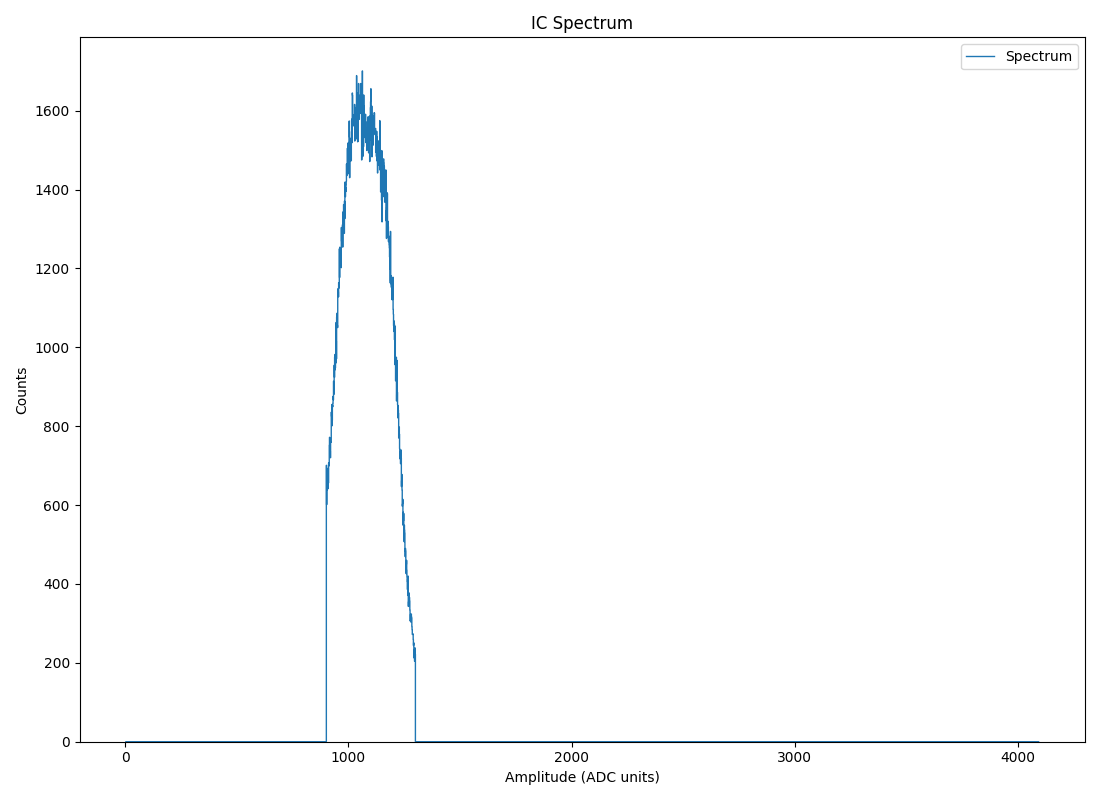

In [45]:
total_events_ic = grammer.get_hist1d('total_events_ic')

fig, ax = plt.subplots(1,1)
ax.stairs(total_events_ic.counts, edges=total_events_ic.bins, label="Spectrum")
ax.set_title('IC Spectrum')
ax.set_xlabel('Amplitude (ADC units)')
ax.set_ylabel("Counts")
ax.legend()
fig.set_figheight(8.0)
fig.set_figwidth(11.0)
fig.tight_layout()

In [46]:
print(sum(total_events_ic.counts))

461561
